1. What is the most popular book?
2. Are books with fewer pages rated higher than those with large page counts?
3. What is the most popular book of the 60s?
4. Who wrote the most pages?
5. What's an author's average page count?
6. How many books have been written with less than 200 pages?
7. What is Houghton Mifflin Harcourt's most popular book?
8. Display the most popular book written by each author.
9. What is the least popular book of the 90s?
10. What is the highest-rated book with over 500 pages?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset from
dataset = pd.read_csv('/content/drive/MyDrive/DS Course/books.csv')

dataset

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11-01-2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12-01-1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,08-01-1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco


In [ ]:
dataset.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780590e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780870e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  float64
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [ ]:
dataset.isnull().sum()  # Sum of All Null Values present in Data set

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
dataset.columns = ['bookID', 'title', 'authors', 'avg_rating', 'isbn',
        'isbn13', 'lang_code', 'num_pages', 'ratings_count', 
        't_rev_c', 'publicat_date', 'publisher']   # Changing Names of Columns

In [ ]:
dataset = dataset.drop(['bookID','isbn','isbn13'] , axis = 1)  # Dropping unusual Data


In [ ]:
dataset

,title,authors,avg_rating,lang_code,num_pages,ratings_count,t_rev_c,publicat_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11-01-2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press
11123,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12-01-1988,Penguin Books
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,08-01-1993,Penguin Books
11125,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco


In [ ]:
len(dataset[dataset['authors']=='NOT A BOOK'])

5

In [ ]:
len(dataset[dataset['num_pages']==0])

76

In [ ]:
dataset = dataset[dataset['authors']!='NOT A BOOK']
dataset = dataset[dataset['num_pages']!=0]

In [ ]:
dataset

,title,authors,avg_rating,lang_code,num_pages,ratings_count,t_rev_c,publicat_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11-01-2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press
11123,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12-01-1988,Penguin Books
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,08-01-1993,Penguin Books
11125,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco


Our Most Popular Books 


In [ ]:
mstpopularbook = dataset.sort_values(by='ratings_count' , ascending = False).loc[:,['title','authors','ratings_count']].head(1)
mstpopularbook

,title,authors,ratings_count
10340,Twilight (Twilight #1),Stephenie Meyer,4597666


Are books with fewer pages rated higher than those with large page counts



In [ ]:
dataset.corrwith(dataset['ratings_count'])

avg_rating       0.038482
num_pages        0.033029
ratings_count    1.000000
t_rev_c          0.865955
dtype: float64

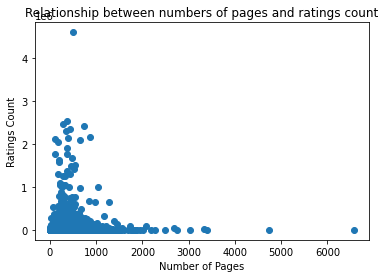

In [ ]:
number_pages = dataset['num_pages']
rating_count = dataset['ratings_count']
plt.scatter(number_pages,rating_count)
plt.title('Relationship between numbers of pages and ratings count')
plt.xlabel('Number of Pages')
plt.ylabel('Ratings Count')
plt.show()

Most Popular Book of 60s

In [ ]:
booksOf60s = dataset[(dataset['publicat_date'].str.slice(-4,) >='1950') & (dataset['publicat_date'].str.slice(-4,) <'1960')]
booksOf60s.head()

,title,authors,avg_rating,lang_code,num_pages,ratings_count,t_rev_c,publicat_date,publisher
147,On Beyond Zebra!,Dr. Seuss,4.04,eng,64,2815,164,09-12-1955,Random House Books for Young Readers
396,The Histories,Herodotus/Aubrey de Sélincourt/John M. Marincola,3.99,eng,622,227,18,09-01-1954,Penguin Classics
442,Euripides I: Alcestis / The Medea / The Heracl...,Euripides/Richmond Lattimore/David Grene/Rex W...,4.03,eng,221,4483,56,2/15/1955,University of Chicago Press
489,Electra and Other Plays,Sophocles/E.F. Watling,4.14,eng,218,135,9,4/30/1953,Penguin
492,The Oedipus Plays of Sophocles,Sophocles/Paul Roche,3.97,eng,390,8,1,09-01-1958,Signet Books (NY)


In [ ]:
popularbooksof60s = booksOf60s.sort_values(by='ratings_count' , ascending = False)
popularbooksof60s.head()

,title,authors,avg_rating,lang_code,num_pages,ratings_count,t_rev_c,publicat_date,publisher
3346,A Streetcar Named Desire,Tennessee Williams,3.98,eng,107,235224,2409,12-01-1952,Dramatists Play Service
5335,Pippi in the South Seas,Astrid Lindgren/Gerry Bothmer,4.11,en-US,126,15193,173,9/18/1959,Viking Books for Young Readers
3096,Arrowsmith,Sinclair Lewis/E.L. Doctorow,3.82,eng,428,5889,300,06-01-1953,Harcourt Brace Jovanovich
10377,Love Poems and Sonnets,William Shakespeare,4.34,eng,160,5808,64,09-03-1957,Doubleday Books
442,Euripides I: Alcestis / The Medea / The Heracl...,Euripides/Richmond Lattimore/David Grene/Rex W...,4.03,eng,221,4483,56,2/15/1955,University of Chicago Press


Most Pages Written By Author

In [ ]:
mostpages_author = dataset.groupby('authors').agg({'num_pages':'sum'}).sort_values(by='num_pages',ascending=False).head(1)
mostpages_author

,num_pages
authors,
Stephen King,18219


 author's average page count

In [ ]:
avg_pages_author = dataset.groupby('authors').agg({'num_pages':'mean'})
avg_pages_author.head()

,num_pages
authors,
A.B. Yehoshua/Hillel Halkin,416.0
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,256.0
A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,232.0
A.J. Jacobs,389.0
A.M. Homes,256.0


books have been written with less than 200 pages?

In [ ]:
books_less_200 = (dataset['num_pages']<200).sum()
books_less_200

2819

 Houghton Mifflin Harcourt's most popular book

In [ ]:
houghton_book = dataset[dataset['authors'] == 'Houghton Mifflin Harcourt']
houghton_book

,title,authors,avg_rating,lang_code,num_pages,ratings_count,t_rev_c,publicat_date,publisher


In [ ]:
booksOf90s = dataset[(dataset['publicat_date'].str.slice(-4,) >='1980') & (dataset['publicat_date'].str.slice(-4,) <'1990')]
booksOf90s.head()

,title,authors,avg_rating,lang_code,num_pages,ratings_count,t_rev_c,publicat_date,publisher
44,The John McPhee Reader (John McPhee Reader #1),John McPhee/William Howarth,4.42,eng,416,562,37,06-01-1982,Farrar Straus and Giroux
46,Heirs of General Practice,John McPhee,4.17,eng,128,268,22,04-01-1986,Farrar Straus and Giroux
52,Rising from the Plains,John McPhee,4.23,eng,208,1341,98,11-01-1987,Farrar Straus and Giroux
65,God Emperor of Dune (Dune Chronicles #4),Frank Herbert,3.84,eng,423,2785,166,6/15/1987,Ace Books
66,Chapterhouse: Dune (Dune Chronicles #6),Frank Herbert,3.91,eng,436,38778,568,07-01-1987,Ace Books


Least popular book of 90s


In [ ]:
leastpopularbooksof90s = booksOf60s.sort_values(by='ratings_count' , ascending = True)
leastpopularbooksof90s.head()

,title,authors,avg_rating,lang_code,num_pages,ratings_count,t_rev_c,publicat_date,publisher
492,The Oedipus Plays of Sophocles,Sophocles/Paul Roche,3.97,eng,390,8,1,09-01-1958,Signet Books (NY)
7577,The Philosophy of History,Georg Wilhelm Friedrich Hegel/J. Sibree,3.82,en-US,457,31,9,06-01-1956,Dover Publications
10330,The Currents of Space (Galactic Empire #2),Isaac Asimov,3.83,eng,192,37,3,01-01-1952,Fawcett crest
7118,Three Greek Plays: Prometheus Bound/Agamemnon/...,Euripides/Aeschylus/Edith Hamilton,4.06,en-US,240,77,13,11/28/1958,W.W. Norton & Company
2545,Atlas Shrugged,Ayn Rand,3.69,en-US,1168,86,12,10-12-1957,Random House


Highest Rated Book With over 500 pages

In [ ]:
high_rated=dataset[dataset['num_pages']>500].sort_values(by='avg_rating',ascending=False)
high_rated.head(1)

,title,authors,avg_rating,lang_code,num_pages,ratings_count,t_rev_c,publicat_date,publisher
5650,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,eng,512,1,0,12-07-2005,T&T Clark Int'l
